## Logistic Regression For classification

### Practice with Rain in Australia dataset from Kaggle



Used in solving binary classification problems where the output has two options. Steps are as follows:

* We take a linear combination(weighted sum of input features)
* We apply the sigmoid function to the result to obtain a number between 0 and 1
* This number represents whether output will be "Yes"
* Instead of RMSE we use cross entropy loss function, To evaluate the results.

Formula as follows: 
$$ \sigma(Z) = \frac{1}{1 + e^{(-z)}} $$

Cross Entropy loss:
$$ L(\hat{y}, y) = -(y\log{\hat{y}} + (1 - y)\log{(1-\hat{y})}) $$


## Log Loss Error Finding 

$$ Log Loss = -\frac{1}{N} \sum_{1=i}^{N} y_i*log(y'_i) + (1 - y_i)*log*(1 - y'_i)$$

Where <br>
$ y_i $ - label for the ith example <br>
$ y'_i $ - model's prediction for the ith example

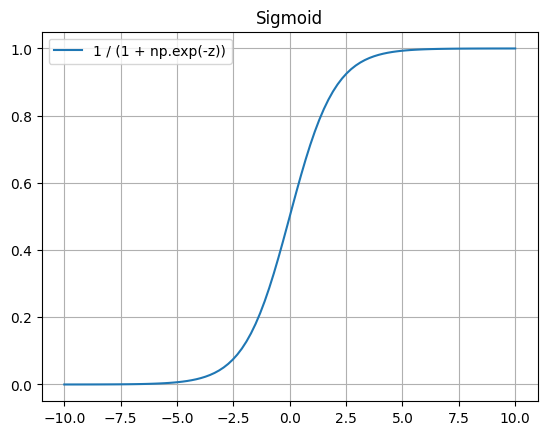

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def sigma(z):
    return 1 / (1 + np.exp(-z))

x = np.linspace(-10, 10, 100)
y = sigma(x)
plt.plot(x, y, label='1 / (1 + np.exp(-z))')
plt.title('Sigmoid')
plt.grid()
plt.legend()
plt.show()

In [2]:
import pandas as pd

raw_df = pd.read_csv('../data/weatherAus.csv')
raw_df.head(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

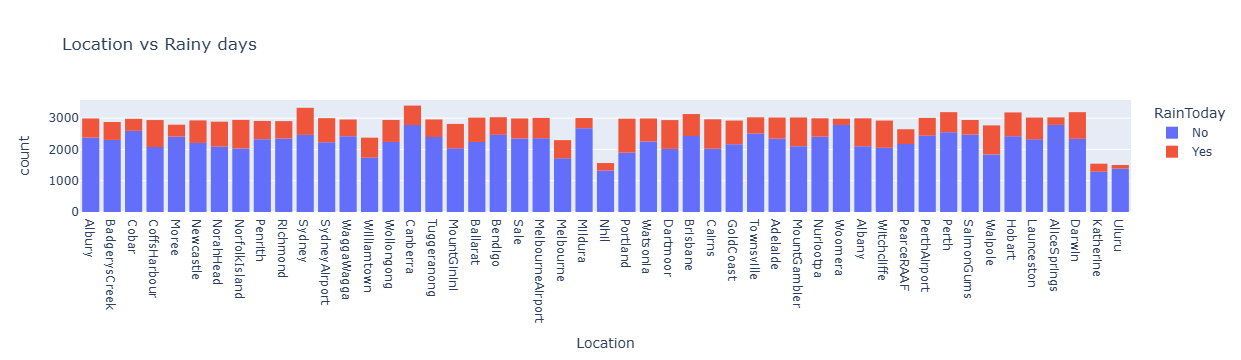

In [5]:
import plotly.express as px
import seaborn as sns

sns.set_style('darkgrid')
px.histogram(raw_df, 'Location', title='Location vs Rainy days', color='RainToday')

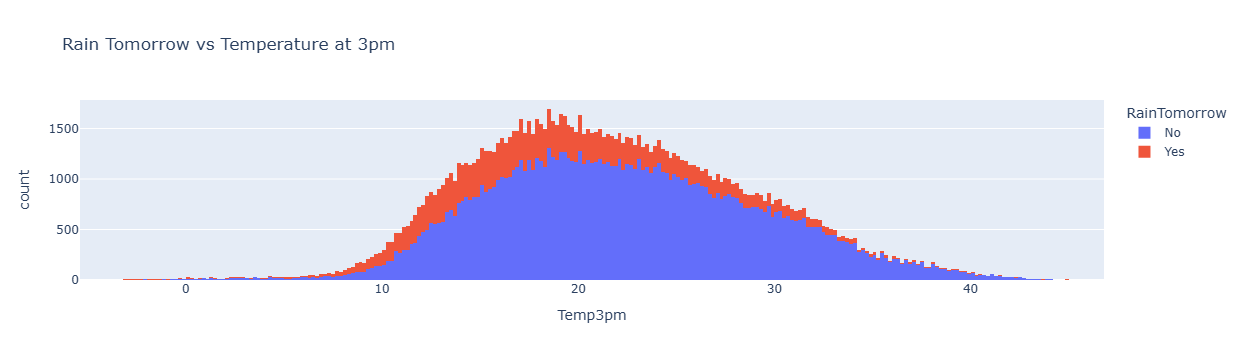

In [6]:
px.histogram(raw_df, 'Temp3pm', title='Rain Tomorrow vs Temperature at 3pm', color='RainTomorrow')

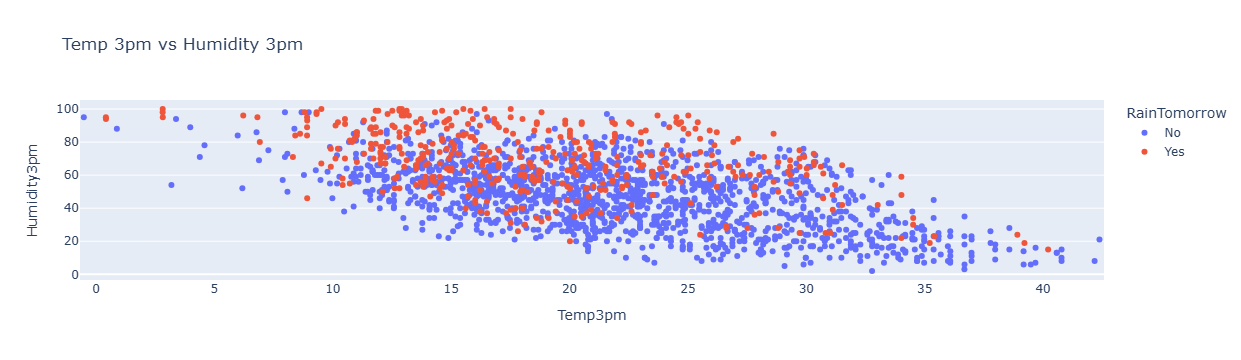

In [7]:
px.strip(raw_df.sample(2000), 
         title='Temp 3pm vs Humidity 3pm',
         x = 'Temp3pm',
         y = 'Humidity3pm',
         color = 'RainTomorrow')

In [8]:
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]


print(train_df.shape, val_df.shape, test_df.shape)

(97988, 23) (17089, 23) (25710, 23)


In [9]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [10]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [11]:
import numpy as np

numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [12]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [13]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

## Imputation

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
raw_df[numeric_cols].isna().sum()
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [15]:
list(imputer.statistics_)

[np.float64(12.184823865620478),
 np.float64(23.235120301822324),
 np.float64(2.349974074310839),
 np.float64(5.472515506887154),
 np.float64(7.630539861047283),
 np.float64(39.97051988882308),
 np.float64(13.990496092519967),
 np.float64(18.631140782316862),
 np.float64(68.82683277087672),
 np.float64(51.44928834695453),
 np.float64(1017.6545771543716),
 np.float64(1015.2579625879797),
 np.float64(4.431160817585808),
 np.float64(4.499250233195188),
 np.float64(16.987066387879914),
 np.float64(21.693182690011074)]

## Replacing Nan Values

In [16]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

## Scaling Numeric Data

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train_inputs[numeric_cols])

MinMaxScaler()

In [18]:
# Apply changes to data

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [19]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

raw_df2 = raw_df[categorical_cols].fillna('Unknown')

encoder.fit(raw_df2)
encoder.categories_


[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=

In [21]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [22]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols].fillna('Unknown'))
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols].fillna('Unknown'))
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols].fillna('Unknown'))

C:\Users\DILSHOD\AppData\Local\Temp\ipykernel_34472\3395297854.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\DILSHOD\AppData\Local\Temp\ipykernel_34472\3395297854.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\DILSHOD\AppData\Local\Temp\ipykernel_34472\3395297854.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

In [23]:
pd.set_option('display.max_columns', None)


In [24]:
test_inputs


Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.798851  0.000000     0.066414  0.533604   
2499     Albury  0.693396  0.722222  0.001078     0.066414  0.533604   
2500     Albury  0.634434  0.521073  0.005930     0.066414  0.533604   
2501     Albury  0.608491  0.532567  0.042049     0.066414  0.533604   
2502     Albury  0.566038  0.517241  0.018329     0.066414  0.533604   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.496169  0.000000     0.066414  0.533604   
145455    Uluru  0.266509  0.526820  0.000000     0.066414  0.533604   
145456    Uluru  0.285377  0.563218  0.000000     0.066414  0.533604   
145457    Uluru  0.327830  0.593870  0.000000     0.066414  0.533604   
145458    Uluru  0.384434  0.595785  0.000000     0.066414  0.533604   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.372093        NaN        ESE      0.000000   
2499           SSE       0.341085        SSE         SE      0.103448   
2500           ENE       0.325581        ESE        ENE      0.126437   
2501           SSE       0.255814         SE        SSE      0.103448   
2502           ENE       0.193798         SE        SSE      0.068966   
...            ...            ...        ...        ...           ...   
145454           E       0.193798        ESE          E      0.172414   
145455           E       0.193798         SE        ENE      0.149425   
145456         NNW       0.124031         SE          N      0.149425   
145457           N       0.240310         SE        WNW      0.103448   
145458          SE       0.170543        SSE          N      0.149425   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802     0.498350   
2499        0.195402         0.54         0.30     0.505785     0.485149   
2500        0.448276         0.62         0.67     0.553719     0.590759   
2501        0.195402         0.74         0.65     0.618182     0.618812   
2502        0.103448         0.92         0.63     0.591736     0.575908   
...              ...          ...          ...          ...          ...   
145454      0.149425         0.59         0.27     0.730579     0.696370   
145455      0.126437         0.51         0.24     0.728926     0.681518   
145456      0.103448         0.56         0.21     0.710744     0.661716   
145457      0.103448         0.53         0.24     0.669421     0.623762   
145458      0.080460         0.51         0.24     0.642975     0.618812   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.694143  0.816406        No                0.0   
2499    0.888889  0.888889  0.665944  0.718750        No                0.0   
2500    0.888889  0.888889  0.600868  0.480469       Yes                0.0   
2501    0.888889  0.888889  0.544469  0.521484       Yes                0.0   
2502    0.888889  0.888889  0.501085  0.533203       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
145454  0.492351  0.499917  0.331887  0.507812        No                0.0   
145455  0.492351  0.499917  0.347072  0.537109        No                0.0   
145456  0.492351  0.499917  0.364425  0.578125        No                0.0   
145457  0.492351  0.499917  0.399132  0.609375        No                0.0   
145458  0.333333  0.222222  0.455531  0.607422        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
.

## Save Data After preprocessing

In [25]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


In [26]:
train_inputs.to_csv('../data/train_inputs.csv')
val_inputs.to_csv('../data/val_inputs.csv')
test_inputs.to_csv('../data/test_inputs.csv')

In [28]:
pd.DataFrame(train_targets).to_csv('../data/logisticRegression/train_targets.csv')
pd.DataFrame(val_targets).to_csv('../data/logisticRegression/val_targets.csv')
pd.DataFrame(test_targets).to_csv('../data/logisticRegression/test_targets.csv')

## Training Logistic Regression model

In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear') # max_iter == 100 by default and tol=1e-3, change this too get better model
model.fit(train_inputs[numeric_cols+encoded_cols], train_targets)


LogisticRegression(solver='liblinear')

In [42]:
pd.DataFrame({
    'features': numeric_cols + encoded_cols,
    'weight': model.coef_.tolist()[0]
}).to_csv('../data/logisticRegression/results/weights.csv') # weights

In [39]:
model.intercept_

array([-2.62151244])

## Making Prediction and Evaluations on Model

In [43]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [56]:
train_preds = model.predict(X_train)

# Amount of rain tomorrow yes 
np.sum(train_preds == 'Yes')

np.int64(15485)

In [57]:
from sklearn.metrics import accuracy_score

accuracy_score(train_targets, train_preds)

0.8519920806629383

## Creating Confusion matrix

In [58]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94625279, 0.05374721],
       [0.477475  , 0.522525  ]])

In [ ]:
train_preds = model.predict_proba(X_train)
train_preds

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    
    return preds

Accuracy: 85.20%


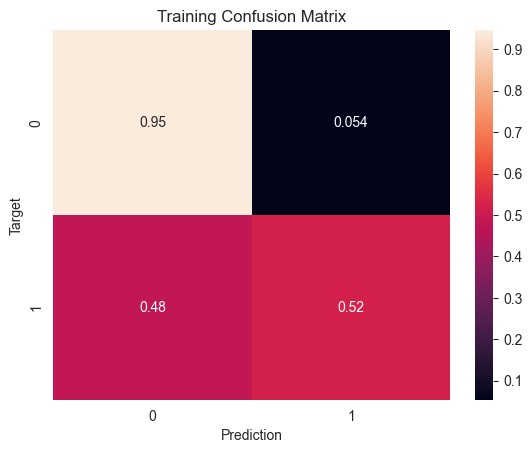

In [60]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 85.41%


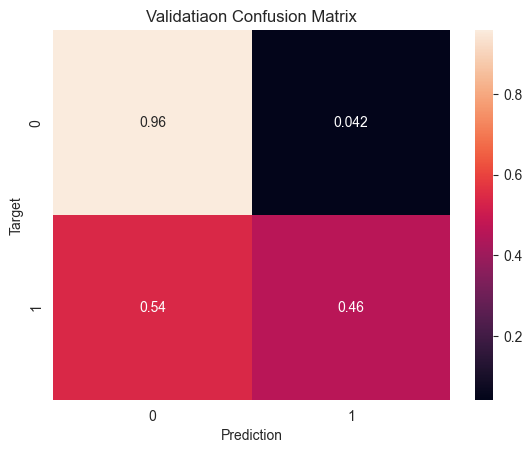

In [61]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 84.19%


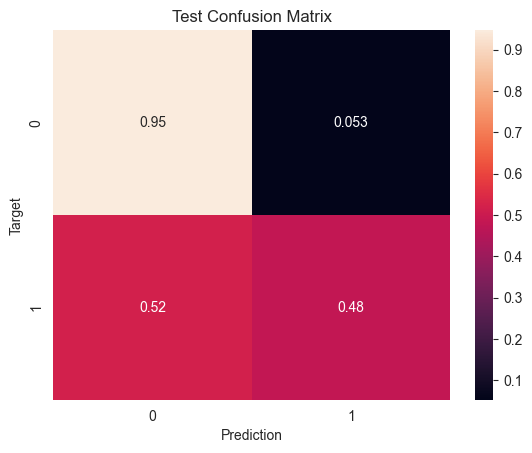

In [62]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

# On a new input

In [63]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [64]:
new_input_df = pd.DataFrame([new_input])

In [65]:
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW           52.0         NW        NNE          13.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          20.0         89.0         58.0       1004.8       1001.5       8.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  
0       5.0     25.7     33.0       Yes

In [66]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

C:\Users\DILSHOD\AppData\Local\Temp\ipykernel_34472\4090555460.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\DILSHOD\AppData\Local\Temp\ipykernel_34472\4090555460.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\DILSHOD\AppData\Local\Temp\ipykernel_34472\4090555460.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

In [67]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.747642  0.714559  0.027493     0.050971  0.533604       0.356589   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0      0.149425      0.229885         0.89         0.58     0.401653   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  Location_Adelaide  \
0     0.371287  0.888889  0.555556  0.685466  0.744141                0.0   

   Location_Albany  Location_Albury  Location_AliceSprings  \
0              0.0              0.0                    0.0   

   Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                     0.0                0.0               0.0   

   Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                0.0              0.0                0.0             0.0   

   Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                    0.0                0.0              0.0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  \
0                 0.0              0.0                 1.0   

   Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
0                  0.0                 0.0                        0.0   

   Location_Mildura  Location_Moree  Location_MountGambier  \
0               0.0             0.0                    0.0   

   Location_MountGinini  Location_Newcastle  Location_Nhil  \
0                   0.0                 0.0            0.0   

   Location_NorahHead  Location_NorfolkIsland  Location_Nuriootpa  \
0                 0.0                     0.0                 0.0   

   Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_Unknown  WindGustDir_W  \
0              0.0             0.0                  0.0            0.0   

   WindGustDir_WNW  WindGustDir_WSW  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_Unknown  WindDir9am_W  \
0             0.0            0.0                 0.0           0.0   

   WindDir9am_WNW  WindDir9am_WSW  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1.0   

   WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
0             0.0            0.0         

In [68]:
prediction = model.predict(X_new_input)[0]

In [69]:
prediction

'Yes'

In [71]:
prob = model.predict_proba(X_new_input)[0]
prob


array([0.48112796, 0.51887204])

# Saving and Loading Trained Models

In [72]:
import joblib

In [73]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [74]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

In [75]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [76]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.8418903150525088